# Building predictive models for the price of a house

The most suitable evaluation metric for the given dataset is Mean Squared Error. As the formula for mean squared error is comprised of square of difference between the predicted value and acual value of target variable. Which will lead to the bigger error value and help us to detect the small errors.

# Building a benchmark model for the given dataset.

# Load Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
data = pd.read_csv('DS - Assignment Part 1 data set.csv')

In [3]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [6]:
# converting the float to datetime format
data['Transaction date'] = pd.to_datetime(data['Transaction date'], format='%y%m%d')
data['Number of bedrooms'] = data['Number of bedrooms'].astype('category')
data['Number of convenience stores'] = data['Number of convenience stores'].astype('category')
# printing dataframe
print(data)
print()

print(data.dtypes)


    Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2020-01-02       32.0                                  84.87882   
1         2020-01-02       19.5                                 306.59470   
2         2020-01-03       13.3                                 561.98450   
3         2020-01-03       13.3                                 561.98450   
4         2020-01-02        5.0                                 390.56840   
..               ...        ...                                       ...   
409       2020-01-03       13.7                                4082.01500   
410       2020-01-02        5.6                                  90.45606   
411       2020-01-03       18.8                                 390.96960   
412       2020-01-03        8.1                                 104.81010   
413       2020-01-03        6.5                                  90.45606   

    Number of convenience stores  latitude  longitude Number of bedrooms  \

In [7]:
data['month'] = data['Transaction date'].dt.month
data['day_of_week'] = data['Transaction date'].dt.weekday

In [8]:
data["House_Price"] = data["House size (sqft)"]*data["House price of unit area"]

In [9]:
data['House_Price'] = data['House_Price'].astype('float64')

In [10]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
month                                                int64
day_of_week                                          int64
House_Price                                        float64
dtype: object

In [11]:
data.describe()

,House Age,Distance from nearest Metro station (km),latitude,longitude,House size (sqft),House price of unit area,month,day_of_week,House_Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.0,414.000000,414.000000
mean,17.712560,1083.885689,24.969030,121.533361,931.475845,37.980193,1.0,3.695652,35597.804106
std,11.392485,1262.109595,0.012410,0.015347,348.910269,13.606488,0.0,0.460687,19890.892075
min,0.000000,23.382840,24.932070,121.473530,402.000000,7.600000,1.0,3.000000,5440.400000
25%,9.025000,289.324800,24.963000,121.528085,548.000000,27.700000,1.0,3.000000,20482.700000
50%,16.100000,492.231300,24.971100,121.538630,975.000000,38.450000,1.0,4.000000,31224.200000
75%,28.150000,1454.279000,24.977455,121.543305,1234.750000,46.600000,1.0,4.000000,48439.375000
max,43.800000,6488.021000,25.014590,121.566270,1500.000000,117.500000,1.0,4.000000,161327.500000


In [12]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [13]:
train.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,month,day_of_week,House_Price
358,2020-01-03,1.1,193.5845,6,24.96571,121.54089,2,1021,45.1,1,4,46047.1
350,2020-01-03,13.2,492.2313,5,24.96515,121.53737,2,1146,42.3,1,4,48475.8
373,2020-01-03,0.0,274.0144,1,24.97480,121.53059,2,1172,52.2,1,4,61178.4
399,2020-01-02,12.7,170.1289,1,24.97371,121.52984,1,489,37.3,1,3,18239.7
369,2020-01-02,20.2,2185.1280,3,24.96322,121.51237,3,1350,22.8,1,3,30780.0


In [14]:
test.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,month,day_of_week,House_Price
310,2020-01-03,16.4,1643.4990,2,24.95394,121.55174,3,886,24.7,1,4,21884.2
316,2020-01-03,13.3,250.6310,7,24.96606,121.54297,2,1307,42.0,1,4,54894.0
178,2020-01-03,13.1,1144.4360,4,24.99176,121.53456,2,1490,36.7,1,4,54683.0
41,2020-01-03,16.8,4066.5870,0,24.94297,121.50342,2,1333,18.2,1,4,24260.6
322,2020-01-03,12.9,187.4823,1,24.97388,121.52981,1,480,33.1,1,4,15888.0
206,2020-01-03,22.2,379.5575,10,24.98343,121.53762,1,456,44.0,1,4,20064.0
282,2020-01-02,2.0,1455.7980,1,24.95120,121.54900,3,1154,25.6,1,3,29542.4
254,2020-01-02,1.1,329.9747,5,24.98254,121.54395,2,965,51.8,1,3,49987.0
393,2020-01-03,16.9,967.4000,4,24.98872,121.53408,1,413,40.3,1,4,16643.9
4,2020-01-02,5.0,390.5684,5,24.97937,121.54245,1,491,43.1,1,3,21162.1


In [15]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['House_Price'].mean()

In [16]:
test['simple_mean']

310    34932.770671
316    34932.770671
178    34932.770671
41     34932.770671
322    34932.770671
           ...     
71     34932.770671
106    34932.770671
270    34932.770671
348    34932.770671
102    34932.770671
Name: simple_mean, Length: 132, dtype: float64

In [17]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

simple_mean_error = MAE(test['House_Price'] , test['simple_mean'])
simple_mean_error

17482.592161901703

# Mean House Price with respect to day of week

In [18]:
day_of_week = pd.pivot_table(train, values='House_Price', index = ['day_of_week'], aggfunc=np.mean)
day_of_week

,House_Price
day_of_week,
3,32047.504255
4,36367.770899


In [19]:
# initializing new column to zero
test['day_of_week_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['day_of_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['day_of_week_mean'][test['day_of_week'] == i] = train['House_Price'][train['day_of_week'] == i].mean()

In [20]:
#calculating mean absolute error
day_of_week_error = MAE(test['House_Price'] , test['day_of_week_mean'] )
day_of_week_error

17587.649246091445

# Mean House Price with respect to month

In [21]:
month = pd.pivot_table(train, values='House_Price', index = ['month'], aggfunc=np.mean)
month

,House_Price
month,
1,34932.770671


In [22]:
# initializing new column to zero
test['month_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['month'].unique():
  # Assign the mean value corresponding to unique entry
  test['month_mean'][test['month'] == i] = train['House_Price'][train['month'] == i].mean()

In [23]:
#calculating mean absolute error
month_error = MAE(test['House_Price'] , test['month_mean'] )
month_error

17482.592161901703

# Mean House Price with respect to House size (sqft)

In [24]:
house_size = pd.pivot_table(train, values='House_Price', index = ['House size (sqft)'], aggfunc=np.mean)
house_size

,House_Price
House size (sqft),
406,16037.0
411,12042.3
414,9563.4
417,16054.5
420,12600.0
...,...
1482,82843.8
1491,60534.6
1494,46239.3


In [25]:
# initializing new column to zero
test['house_size_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['House size (sqft)'].unique():
  # Assign the mean value corresponding to unique entry
  test['house_size_mean'][test['House size (sqft)'] == i] = train['House_Price'][train['House size (sqft)'] == i].mean()

In [26]:
#calculating mean absolute error
month_error = MAE(test['House_Price'] , test['house_size_mean'] )
month_error

31298.059848484852

# Mean House Price with respect to House price of unit area

In [27]:
House_price_unit_area = pd.pivot_table(train, values='House_Price', index = ['House price of unit area'], aggfunc=np.mean)
House_price_unit_area

,House_Price
House price of unit area,
7.6,10374.0
11.2,10449.6
12.2,6039.0
12.9,19350.0
13.0,15691.0
...,...
63.3,55007.7
67.7,39198.3
70.1,101014.1


In [28]:
# initializing new column to zero
test['House_price_unit_area_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['House price of unit area'].unique():
  # Assign the mean value corresponding to unique entry
  test['House_price_unit_area_mean'][test['House price of unit area'] == i] = train['House_Price'][train['House price of unit area'] == i].mean()

In [29]:
#calculating mean absolute error
month_error = MAE(test['House_Price'] , test['House_price_unit_area_mean'] )
month_error

27128.446085858588

# Mean House Price with respect to Distance from nearest Metro station (km)

In [30]:
distance_from_station = pd.pivot_table(train, values='House_Price', index = ['Distance from nearest Metro station (km)'], aggfunc=np.mean)
distance_from_station

,House_Price
Distance from nearest Metro station (km),
23.38284,63585.800000
56.47425,41406.733333
57.58945,42700.000000
84.87882,21792.500000
87.30222,50444.100000
...,...
4573.77900,23155.200000
5512.03800,23803.200000
6306.15300,21585.000000


In [31]:
# initializing new column to zero
test['distance_from_station_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['Distance from nearest Metro station (km)'].unique():
  # Assign the mean value corresponding to unique entry
  test['distance_from_station_mean'][test['Distance from nearest Metro station (km)'] == i] = train['House_Price'][train['Distance from nearest Metro station (km)'] == i].mean()

In [32]:
#calculating mean absolute error
month_error = MAE(test['House_Price'] , test['distance_from_station_mean'] )
month_error

27469.47592261905

# Mean House Price with respect to Number of convenience stores

In [33]:
convenience_stores = pd.pivot_table(train, values='House_Price', index = ['Number of convenience stores'], aggfunc=np.mean)
convenience_stores

,House_Price
Number of convenience stores,
0,26269.111905
1,25836.578125
2,26920.025000
3,27974.473333
4,34202.133333
5,41166.032653
6,40868.396000
7,43168.966667
8,40829.242105


In [34]:
# initializing new column to zero
test['convenience_stores_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['Number of convenience stores'].unique():
  # Assign the mean value corresponding to unique entry
  test['convenience_stores_mean'][test['Number of convenience stores'] == i] = train['House_Price'][train['Number of convenience stores'] == i].mean()

In [35]:
#calculating mean absolute error
month_error = MAE(test['House_Price'] , test['convenience_stores_mean'] )
month_error

15485.169979515887

# Mean Trip Duration with respect to both Distance from nearest Metro station (km) and Number of convenience stores

In [36]:
combo = pd.pivot_table(train, values = 'House_Price', index = ['Distance from nearest Metro station (km)','Number of convenience stores'], aggfunc = np.mean)
combo

,,House_Price
Distance from nearest Metro station (km),Number of convenience stores,
23.38284,7,63585.800000
56.47425,7,41406.733333
57.58945,7,42700.000000
84.87882,10,21792.500000
87.30222,10,50444.100000
...,...,...
4573.77900,0,23155.200000
5512.03800,1,23803.200000
6306.15300,1,21585.000000


In [37]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s1 = 'Number of convenience stores'
s2 = 'Distance from nearest Metro station (km)'
# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['House_Price'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [38]:
#calculating mean absolute error
super_mean_error = MAE(test['House_Price'] , test['Super_mean'] )
super_mean_error

36919.70454545455

# Mean House Price with respect to Number of bedrooms

In [39]:
bedrooms = pd.pivot_table(train, values='House_Price', index = ['Number of bedrooms'], aggfunc=np.mean)
bedrooms

,House_Price
Number of bedrooms,
1,19516.528000
2,42628.764835
3,44077.214130


In [40]:
# initializing new column to zero
test['bedrooms_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['Number of bedrooms'].unique():
  # Assign the mean value corresponding to unique entry
  test['bedrooms_mean'][test['Number of bedrooms'] == i] = train['House_Price'][train['Number of bedrooms'] == i].mean()

In [41]:
#calculating mean absolute error
bedrooms_error = MAE(test['House_Price'] , test['bedrooms_mean'] )
bedrooms_error

12631.777254611332

# Mean House Price with respect to House Age

In [42]:
House_Age = pd.pivot_table(train, values='House_Price', index = ['House Age'], aggfunc=np.mean)
House_Age

,House_Price
House Age,
0.0,57439.875000
1.0,58000.800000
1.1,38317.433333
1.5,63585.800000
1.8,13905.000000
...,...
40.9,39771.150000
41.3,31203.900000
41.4,33738.900000


In [43]:
# initializing new column to zero
test['House Age_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['House Age'].unique():
  # Assign the mean value corresponding to unique entry
  test['House Age_mean'][test['House Age'] == i] = train['House_Price'][train['House Age'] == i].mean()

In [44]:
#calculating mean absolute error
House_Age_error = MAE(test['House_Price'] , test['House Age_mean'] )
House_Age_error

28290.379936868685

# Mean House Price with respect to Number of bedrooms and House Age

In [45]:
combo = pd.pivot_table(train, values = 'House_Price', index = ['Number of bedrooms','House Age'], aggfunc = np.mean)
combo

House_Price
Number of bedrooms House Age             
1                  0.0           28281.15
                   1.1           22638.00
                   1.8           13905.00
                   2.1           19201.00
                   3.1           28572.30
...                                   ...
3                  39.7          31590.00
                   40.1          59849.30
                   41.3          31203.90
                   42.7          43560.20
                   43.8          42700.00

[241 rows x 1 columns]

In [46]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s1 = 'House Age'
s2 = 'Number of bedrooms'
# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['House_Price'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [47]:
#calculating mean absolute error
super_mean_error = MAE(test['House_Price'] , test['Super_mean'] )
super_mean_error

36919.70454545455

# Build a K-Nearest neighbours model for the given dataset and find the best value of K.

In [48]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
month                                                int64
day_of_week                                          int64
House_Price                                        float64
dtype: object

In [49]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,month,day_of_week,House_Price
358,2020-01-03,1.1,193.5845,6,24.96571,121.54089,2,1021,45.1,1,4,46047.1
350,2020-01-03,13.2,492.2313,5,24.96515,121.53737,2,1146,42.3,1,4,48475.8
373,2020-01-03,0.0,274.0144,1,24.97480,121.53059,2,1172,52.2,1,4,61178.4
399,2020-01-02,12.7,170.1289,1,24.97371,121.52984,1,489,37.3,1,3,18239.7
369,2020-01-02,20.2,2185.1280,3,24.96322,121.51237,3,1350,22.8,1,3,30780.0


In [50]:
data.dtypes

Transaction date                            datetime64[ns]
House Age                                          float64
Distance from nearest Metro station (km)           float64
Number of convenience stores                      category
latitude                                           float64
longitude                                          float64
Number of bedrooms                                category
House size (sqft)                                    int64
House price of unit area                           float64
month                                                int64
day_of_week                                          int64
House_Price                                        float64
dtype: object

# Outlier Detection and Removal

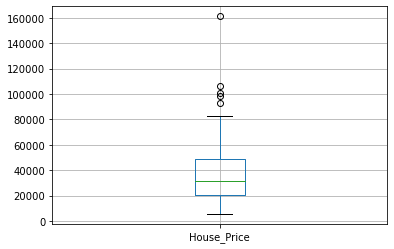

In [51]:
data.boxplot(column = ['House_Price'])
plt.show()

In [52]:
data['log_House_Price'] = np.log(data['House_Price'].values + 1)
data['log_House_Price'] = data['log_House_Price'].astype('float16')

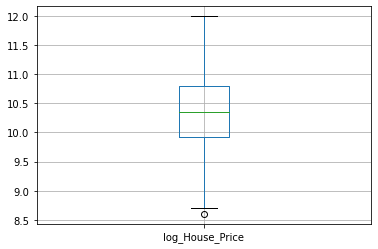

In [53]:
data.boxplot(column = ['log_House_Price'])
plt.show()

In [54]:
data = data.loc[(data.log_House_Price > 8.65) & (data.log_House_Price < 13)]

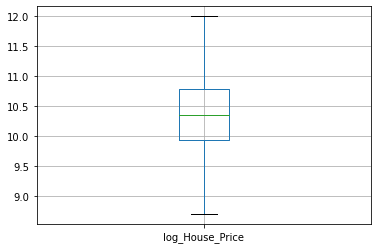

In [55]:
data.boxplot(column = ['log_House_Price'])
plt.show()

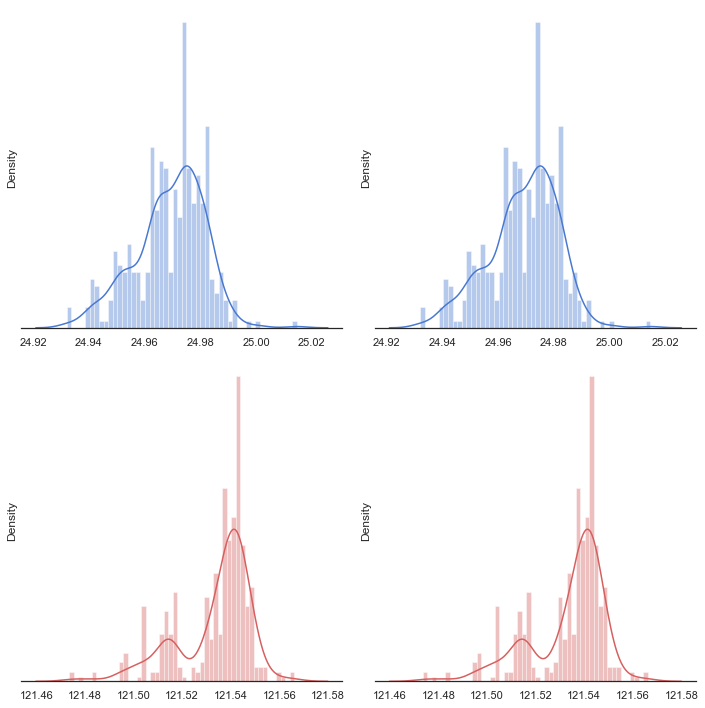

In [56]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10), sharex = False, sharey = False)
sns.despine(left=True)
sns.distplot(data['latitude'].values, label = 'latitude', color="b", bins = 50, ax=axes[0,0])
sns.distplot(data['latitude'].values, label = 'latitude', color="b", bins = 50, ax=axes[0,1])
sns.distplot(data['longitude'].values, label = 'longitude', color="r", bins =50, ax=axes[1,0])
sns.distplot(data['longitude'].values, label = 'longitude', color="r", bins =50, ax=axes[1,1])

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [57]:
data = pd.get_dummies(data.drop(['House_Price', 'Transaction date', 'House Age', 'House size (sqft)', 'Distance from nearest Metro station (km)', 'House price of unit area'], axis = 1))

In [58]:
data.head()

,latitude,longitude,month,day_of_week,log_House_Price,Number of convenience stores_0,Number of convenience stores_1,Number of convenience stores_2,Number of convenience stores_3,Number of convenience stores_4,Number of convenience stores_5,Number of convenience stores_6,Number of convenience stores_7,Number of convenience stores_8,Number of convenience stores_9,Number of convenience stores_10,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
358,24.96571,121.54089,1,4,10.734375,0,0,0,0,0,0,1,0,0,0,0,0,1,0
350,24.96515,121.53737,1,4,10.789062,0,0,0,0,0,1,0,0,0,0,0,0,1,0
373,24.97480,121.53059,1,4,11.023438,0,1,0,0,0,0,0,0,0,0,0,0,1,0
399,24.97371,121.52984,1,3,9.812500,0,1,0,0,0,0,0,0,0,0,0,1,0,0
369,24.96322,121.51237,1,3,10.335938,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Segregating variables: Independent and Dependent Variables

In [59]:
#seperating independent and dependent variables

#features
x = data.drop(['log_House_Price'], axis=1)

#target
y = data['log_House_Price']

x.shape, y.shape

((413, 18), (413,))

# Scaling the data (Using MinMax Scaler)

In [60]:
# Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [61]:
x = pd.DataFrame(x_scaled, columns = x.columns)
x.head()

,latitude,longitude,month,day_of_week,Number of convenience stores_0,Number of convenience stores_1,Number of convenience stores_2,Number of convenience stores_3,Number of convenience stores_4,Number of convenience stores_5,Number of convenience stores_6,Number of convenience stores_7,Number of convenience stores_8,Number of convenience stores_9,Number of convenience stores_10,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
0,0.407659,0.726332,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.400873,0.688376,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.517814,0.615268,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.504605,0.607181,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.377484,0.418805,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

# Implementing KNN Regressor

In [63]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_log_error as mse

# Elbow for Regressor

In [64]:
#creating instance of KNN
reg = KNN(n_neighbors = 8)

# Fitting the Model
reg.fit(train_x, train_y)

# Predicting over the Train Set and Calculating MSE
test_predict = reg.predict(test_x)
k = mse(test_predict, test_y)
print("Test MSE    ", k)

Test MSE     0.000995


In [65]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for every value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

In [66]:
# Defining K range
k = range(1, 200, 10)

In [67]:
test_calc = Elbow(k)

In [68]:
test_calc

[0.001234,
 0.00096,
 0.00103,
 0.001013,
 0.000977,
 0.001031,
 0.0010805,
 0.001105,
 0.001139,
 0.00122,
 0.001268,
 0.001267,
 0.001293,
 0.0013275,
 0.00136,
 0.001404,
 0.001462,
 0.001536,
 0.001608,
 0.0016775]

Text(0.5, 1.0, 'Elbow Curve for test')

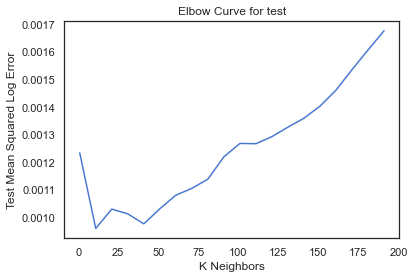

In [69]:
# Plotting the Curves
plt.plot(k, test_calc)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Log Error')
plt.title('Elbow Curve for test')

Taking all the values between 1 and 20.

In [70]:
# Defining K range
k = range(1, 25)

In [71]:
test_calc_new = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

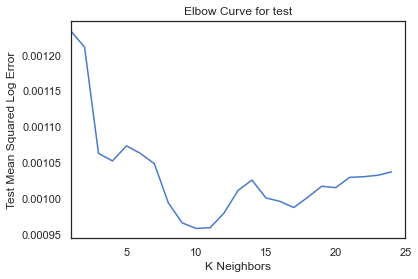

In [72]:
# Plotting the Curves
plt.plot(k, test_calc_new)
plt.xlim(1, 25)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Log Error')
plt.title('Elbow Curve for test')

In [73]:
# Creating instance of KNN
reg = KNN(n_neighbors = 8)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
train_predict = reg.predict(train_x)
test_predict = reg.predict(test_x)
k_train_knn = mse(train_predict, train_y)
k_test_knn = mse(test_predict, test_y)
print('Train MSE    ', k_train_knn )
print('Test MSE     ', k_test_knn)

Train MSE     0.0007877
Test MSE      0.000995


# Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.

In [74]:
# As the dataset is already loaded and cleaned, we don't need to do preprocessing here.
data.head()

,latitude,longitude,month,day_of_week,log_House_Price,Number of convenience stores_0,Number of convenience stores_1,Number of convenience stores_2,Number of convenience stores_3,Number of convenience stores_4,Number of convenience stores_5,Number of convenience stores_6,Number of convenience stores_7,Number of convenience stores_8,Number of convenience stores_9,Number of convenience stores_10,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
358,24.96571,121.54089,1,4,10.734375,0,0,0,0,0,0,1,0,0,0,0,0,1,0
350,24.96515,121.53737,1,4,10.789062,0,0,0,0,0,1,0,0,0,0,0,0,1,0
373,24.97480,121.53059,1,4,11.023438,0,1,0,0,0,0,0,0,0,0,0,0,1,0
399,24.97371,121.52984,1,3,9.812500,0,1,0,0,0,0,0,0,0,0,0,1,0,0
369,24.96322,121.51237,1,3,10.335938,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Segregating variables: Independent and Dependent Variables

In [75]:
# seperating independent and dependent variables

# Features
x = data.drop(['log_House_Price'], axis=1)

# Target
y = data['log_House_Price']

x.shape, y.shape

((413, 18), (413,))

# Splitting the data into train set and the test set

In [76]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

# Implementing Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
train_error_reg = []
test_error_reg = []

lr = LinearRegression(normalize=True)

train_x_array = np.array(train_x)
train_y_array = np.array(train_y)
test_x_array = np.array(test_x)
test_y_array = np.array(test_y)

for i in range(1, 19):
    lr.fit(train_x_array[:, 0:i], train_y)
    train_y_pred = lr.predict(train_x_array[:, 0:i])
    test_y_pred = lr.predict(test_x_array[:, 0:i])
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x_array[:, 0:i].shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x_array[:, 0:i].shape[0]
    
    train_error_reg.append(mrss_train)
    test_error_reg.append(mrss_test)

In [79]:
# Initializing the dataframe to store error

col = ['train_error_reg','test_error_reg']
ind = ['Number_of_variable_%d'%i for i in range(1, train_x.shape[1]+1)]
matrix_reg = pd.DataFrame(index=ind, columns=col)

In [80]:
matrix_reg['train_error_reg'] = train_error_reg
matrix_reg['test_error_reg'] = test_error_reg
matrix_reg

,train_error_reg,test_error_reg
Number_of_variable_1,0.278727,0.246358
Number_of_variable_2,0.259593,0.222837
Number_of_variable_3,0.259593,0.222837
Number_of_variable_4,0.258568,0.222610
Number_of_variable_5,0.255566,0.218994
Number_of_variable_6,0.254973,0.219137
Number_of_variable_7,0.250966,0.221390
Number_of_variable_8,0.244927,0.227974
Number_of_variable_9,0.239462,0.220069
Number_of_variable_10,0.238742,0.219365


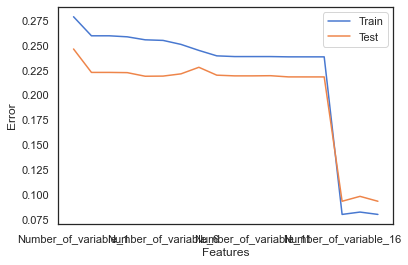

In [81]:
# Plotting the Features VS Error curve

matrix_reg[['train_error_reg','test_error_reg']].plot()
plt.xlabel('Features')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

# Parameters of Linear Regression

In [82]:
lr.coef_

array([ 1.23849788e+01,  6.43171532e+00,  9.99200722e-16,  4.52015452e-02,
       -2.02206565e-01, -9.28551144e-02, -1.97389073e-01, -1.59043342e-01,
       -8.30496943e-02,  7.95938327e-02,  1.76591081e-01,  1.99858969e-01,
        9.86466632e-02,  2.25125248e-01,  1.40553390e-01, -5.45067168e-01,
        2.89242562e-01,  2.87706099e-01])

# Plotting the coefficients

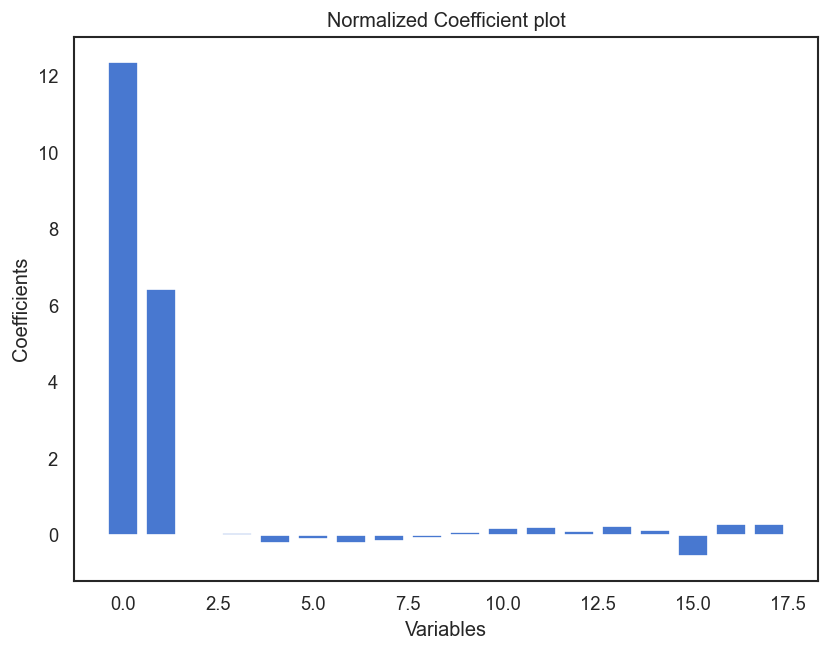

In [83]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

# Creating new subsets of data

In [84]:
# Seperating independent and dependent variables
x = data.drop(['log_House_Price'], axis=1)
y = data['log_House_Price']
x.shape, y.shape

((413, 18), (413,))

# Arranging coefficients with features

In [85]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,latitude,1.238498e+01
1,longitude,6.431715e+00
2,month,9.992007e-16
3,day_of_week,4.520155e-02
4,Number of convenience stores_0,-2.022066e-01


# Choosing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [86]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

# Extracting the significant subset do independent Variables

In [87]:
subset = data[sig_var['Variable'].values]
subset.head()

,latitude,longitude
358,24.96571,121.54089
350,24.96515,121.53737
373,24.97480,121.53059
399,24.97371,121.52984
369,24.96322,121.51237


In [88]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

In [89]:
# Importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [90]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [91]:
train_y_pred = lr.predict(train_x)
test_y_pred = lr.predict(test_x)
    
mrss_train_regression = sum((train_y_pred-train_y)**2)/train_x.shape[0]
mrss_test_regression = sum((test_y_pred-test_y)**2)/test_x.shape[0]

print('Train Error : ', mrss_train_regression)
print('Test Error  : ', mrss_test_regression)

Train Error :  0.25959324260823263
Test Error  :  0.2228372760296115


# Plotting the coefficients

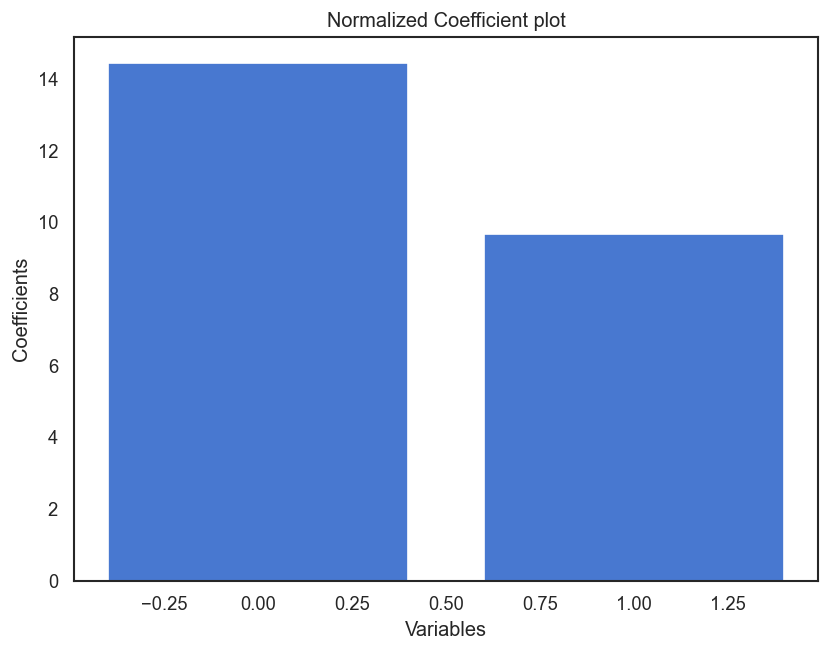

In [92]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
columns = range(len(train_x.columns))
coef = lr.coef_
plt.bar(columns, coef)
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

Interpretation from the linear variable Coefficients -

• The above coefficient is normalized which can be used for making final inferences out of it.

• From the above coefficient plot, we can observe that most of the variables aren't contributing in the linear model, only 2 variables are mostly contributing in the linear regression model.

# Regularisation:

# Ridge

In [93]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [94]:
# Setting the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [95]:
train_error_ridge = []
test_error_ridge = []

for i in alpha_ridge:
    
    R = Ridge(alpha = i, normalize=True)
    R.fit(train_x, train_y)
    train_y_pred = R.predict(train_x)
    test_y_pred = R.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_ridge.append(mrss_train)
    test_error_ridge.append(mrss_test)

In [96]:
R.coef_

array([0.74225349, 0.544112  ])

In [97]:
# Initializing the dataframe to store error

col = ['train_error_ridge','test_error_ridge']
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [98]:
matrix_ridge['train_error_ridge'] = train_error_ridge
matrix_ridge['test_error_ridge'] = test_error_ridge
matrix_ridge

,train_error_ridge,test_error_ridge
alpha_0,0.259593,0.222837
alpha_1e-08,0.259593,0.222837
alpha_0.0001,0.259593,0.222839
alpha_0.001,0.259593,0.222854
alpha_0.01,0.259597,0.223006
alpha_1,0.272915,0.244410
alpha_5,0.306715,0.282695
alpha_10,0.319112,0.295816
alpha_20,0.327233,0.304277
alpha_25,0.329056,0.306164


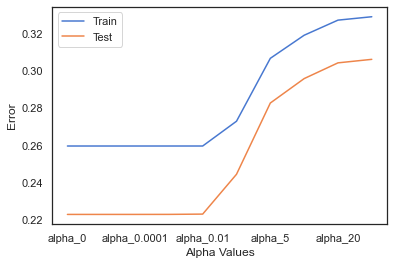

In [99]:
# Plotting the Alpha Values VS Error graph

matrix_ridge[['train_error_ridge','test_error_ridge']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

From the above plot, we can observe that the least error we can get is at alpha_0.01.

In [100]:
matrix_ridge.min()[0]

0.25959324260823274

# Interpreting the coefficients

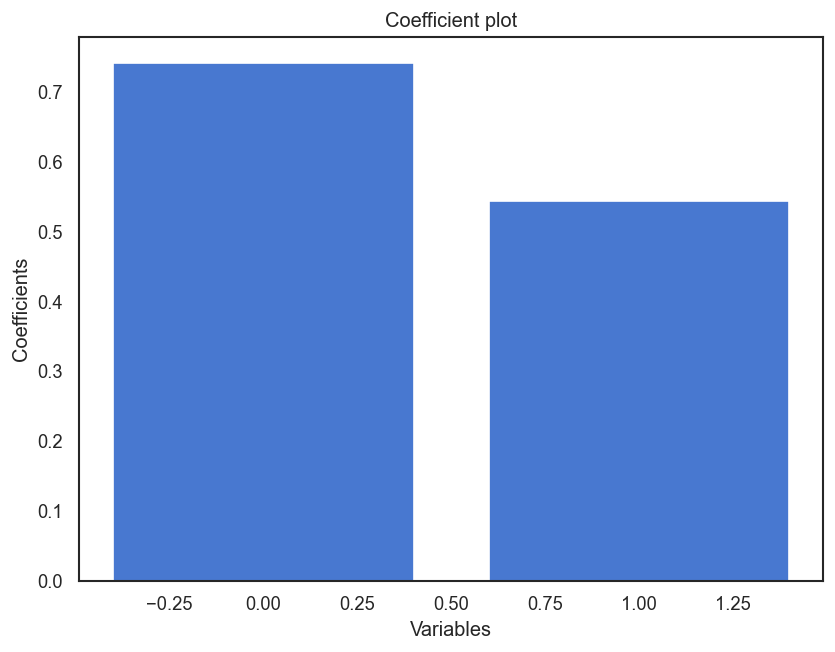

In [101]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = R.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.show()

Interpretation from the linear variable Coefficients -

• The above coefficient is normalized which can be used for making final inferences out of it.

• From the above coefficient plot, we can interpret that 2 of the variables are mostly contributing in the linear model while rest a=do not have any major impact on the ridge regression model.

# Lasso

In [102]:
# Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [103]:
# Definining the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [104]:
train_error_lasso = []
test_error_lasso = []

for i in alpha_lasso:
    
    L = Lasso(alpha = i, normalize=True)
    L.fit(train_x, train_y)
    train_y_pred = L.predict(train_x)
    test_y_pred = L.predict(test_x)
    
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    
    train_error_lasso.append(mrss_train)
    test_error_lasso.append(mrss_test)

In [105]:
# Initializing the dataframe to store error

col = ['train_error_lasso','test_error_lasso']
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [106]:
matrix_lasso['train_error_lasso'] = train_error_lasso
matrix_lasso['test_error_lasso'] = test_error_lasso
matrix_lasso

,train_error_lasso,test_error_lasso
alpha_0,0.259593,0.222837
alpha_1e-10,0.259593,0.222837
alpha_1e-08,0.259593,0.222837
alpha_1e-05,0.259593,0.222855
alpha_0.0001,0.259598,0.223022
alpha_0.001,0.260029,0.225019
alpha_0.01,0.303214,0.278454
alpha_1,0.337138,0.314485
alpha_5,0.337138,0.314485
alpha_10,0.337138,0.314485


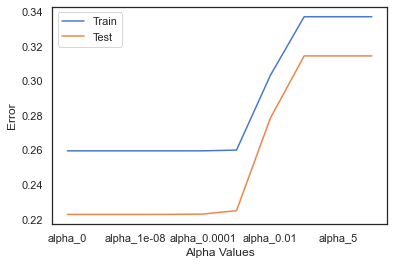

In [107]:
# Plotting the Alpha Values VS Error graph

matrix_lasso[['train_error_lasso','test_error_lasso']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('Error')
plt.legend(['Train', 'Test'])
plt.show()

From the above plot, we can observe that the least error we can get is at alpha_0.01.

In [108]:
matrix_lasso.min()

train_error_lasso    0.259593
test_error_lasso     0.222837
dtype: float64

# Plotting the coefficients

In [109]:
L.coef_

array([0., 0.])

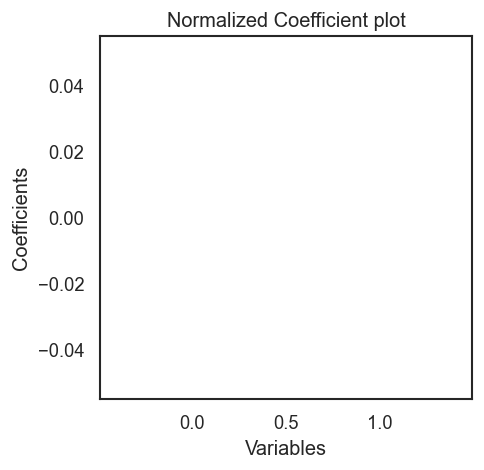

In [110]:
plt.figure(figsize=(4, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = L.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')
plt.show()

Interpretation from the linear variable Coefficients -

• The above coefficient is normalized which can be used for making final inferences out of it.

• From the above coefficient plot, we can interpret that none of the variables are contributing in the lasso modeling.

# Plotting the following Barplots:

a. train score of all the above models.

b. test (not validation!) score of all the above models.

c. Attempt to explain the observations from the plots (optional).

In [111]:
# Collecting scores from the models and putting them in respective variables.

# KNN
a = (1 - k_train_knn)*100
b = (1 - k_test_knn)*100

# Linear Regression
c = (1 - mrss_train_regression)*100
d = (1 - mrss_test_regression)*100

# Ridge Regression
e = (1 - matrix_ridge.min()[0])*100
f = (1 - matrix_ridge.min()[1])*100

# Lasso Regression
g = (1 - matrix_lasso.min()[0])*100
h = (1 - matrix_lasso.min()[1])*100

# Train Error Bar plot

In [112]:
train_error_name = ['Train Score KNN',
                    'Train Score Linear Regression',
                    'Train Score Ridge',
                    'Train Score Lasso']
score_train = [a, c, e, g]

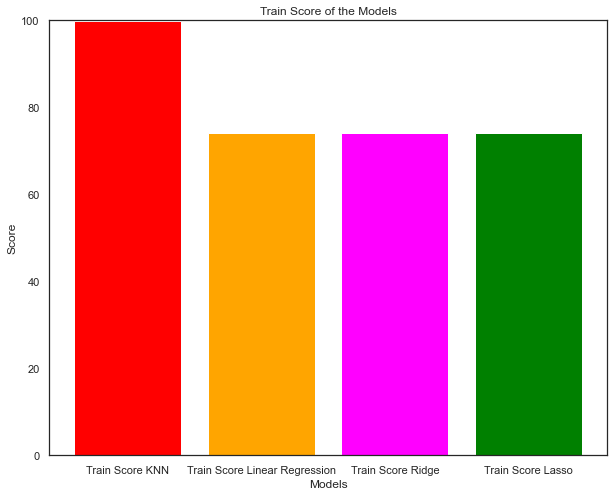

In [113]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(train_error_name, score_train, color=['red', 'orange', 'magenta', 'green'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Train Score of the Models');

Observation -

From the above bar plot it can be observed that the train score of KNN model has the best score among all of the other models.

# Test error Bar plot

In [114]:
test_error_name = ['Test Score KNN',
                   'Test Score Linear Regression',
                   'Test Score Ridge',
                   'Test Score Lasso']
score_test = [b, d, f, h]

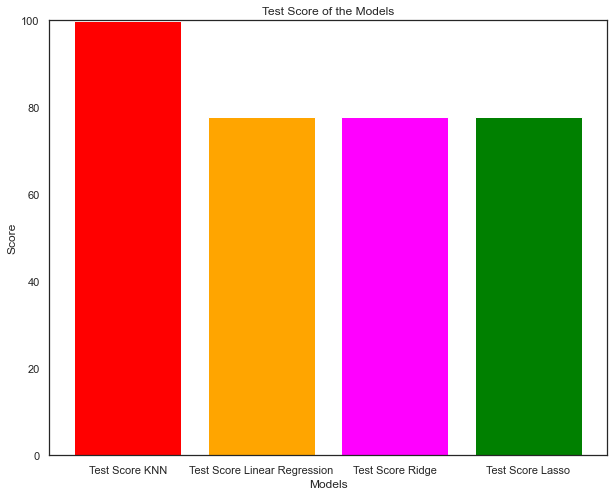

In [115]:
plt.figure(figsize = (10, 8))
plt.ylim(0, 100)
plt.bar(test_error_name, score_test, color=['red', 'orange', 'magenta', 'green', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Test Score of the Models');

Observation -

From the above test score bar plot, KNN model is performing best with least test error and better score among all the other models.

# Overall observation -

From the above bar plots, it can be seen that both the train and test score of all models are in sync with each other and out of all these models, K-Nearest Neighbor model is performing better than the other models.